# 지역별 관광지 분포 분석

분석하고자 하는 목적:

지역별 관광지 분포 이해:각 지역의 특성과 관광지 분포를 파악하여 관광 산업에 대한 이해를 높입니다.

예상되는 결과:

(1)지역의 주요 관광 테마: 각 클러스터의 특성을 분석하여 각 지역이 주로 추구하는 관광 테마를 파악할 수 있습니다. 예를 들어 자연 경관, 역사 문화, 레저 등의 테마가 될 수 있습니다.
(2)지역별 관광지 현황과 발전 방향: 각 클러스터에 속한 지역의 관광 자원과 발전 방향을 분석하여, 관광지의 현재 상황과 발전 가능성을 제시할 수 있습니다.

In [1]:
# import the Seaborn package for good data visualization.

%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [47]:
# append Tourist_attractionsByTouristCourse.csv
# Load up a dataframe with some data. 

# 파일을 읽어 DataFrame으로 저장
df = pd.read_csv("./Tourist_attractionsByTouristCourse.csv", encoding='euc-kr')

# 결측치 처리 
df.dropna(inplace=True)  

# DataFrame의 첫 부분을 출력하여 데이터를 확인

display(df.head())

,테마분류,코스 아이디,관광지 아이디,지역 아이디,관광지명,경도(도),위도(도),코스순서,이동시간,실내구분,테마명
0,TH05,177,17703,4822051000,(통영)세병관(통제영지),128.423238,34.847749,3,2,실외,종교/역사/전통
1,TH05,177,17704,4822051000,(통영)충렬사,128.417847,34.846626,4,3,실외,종교/역사/전통
2,TH02,177,17705,4822051000,(통영)해저터널,128.409908,34.834504,5,5,실외,체험/학습/산업
3,TH05,177,17706,4822051000,(통영)착량묘,128.410558,34.835804,6,6,실외,종교/역사/전통
4,TH03,177,17707,4822059000,(통영)도남관광지,128.432766,34.828362,7,7,실외,자연/힐링


Get information about the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785 entries, 0 to 2784
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   테마분류     2785 non-null   object 
 1   코스 아이디   2785 non-null   int64  
 2   관광지 아이디  2785 non-null   int64  
 3   지역 아이디   2785 non-null   int64  
 4   관광지명     2785 non-null   object 
 5   경도(도)    2785 non-null   float64
 6   위도(도)    2785 non-null   float64
 7   코스순서     2785 non-null   int64  
 8   이동시간     2785 non-null   int64  
 9   실내구분     2785 non-null   object 
 10  테마명      2785 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 239.5+ KB


Double-check for null values, by calling isnull() and verifying the sum being 0

In [7]:
df.isnull().sum()

테마분류       0
코스 아이디     0
관광지 아이디    0
지역 아이디     0
관광지명       0
경도(도)      0
위도(도)      0
코스순서       0
이동시간       0
실내구분       0
테마명        0
dtype: int64

In [8]:
df.describe()

,코스 아이디,관광지 아이디,지역 아이디,경도(도),위도(도),코스순서,이동시간
count,2785.000000,2785.000000,2.785000e+03,2785.000000,2785.000000,2785.000000,2785.000000
mean,234.277558,23431.994973,4.252588e+09,127.766209,35.837930,4.242370,6.278276
std,123.736128,12374.016169,9.666578e+08,0.940013,1.278690,2.764941,5.861958
min,1.000000,101.000000,1.111052e+09,124.634180,33.207767,1.000000,0.000000
25%,127.000000,12703.000000,4.215059e+09,126.926743,35.114930,2.000000,2.000000
50%,234.000000,23409.000000,4.671025e+09,127.740897,35.760939,4.000000,5.000000
75%,340.000000,34006.000000,4.831031e+09,128.581474,36.785731,6.000000,9.000000
max,438.000000,43812.000000,5.013062e+09,131.859723,38.514711,17.000000,63.000000


In [49]:
# 지역 아이디를 기준으로 그룹화하여 각 지역의 관광지 수 계산
tourist_spots_by_region = df.groupby('지역 아이디').size().reset_index(name='관광지 수')

In [50]:
# 경도(도)와 위도(도) 열만 추출
X = df[['경도(도)', '위도(도)']]

In [51]:
# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

엘보우 방법을 사용하여 최적의 클러스터 수 결정 및 WCSS 그래프 생성

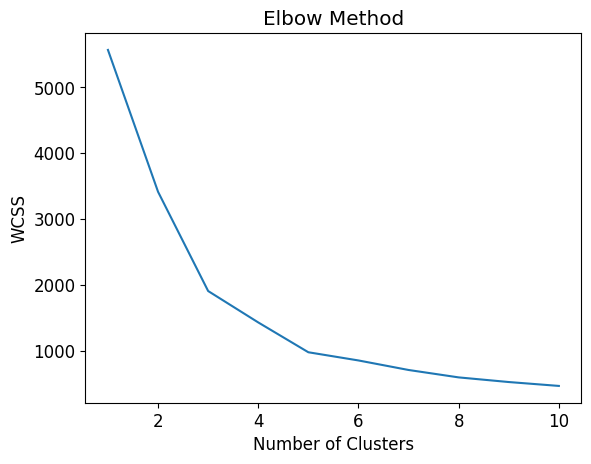

In [52]:
# 엘보우 방법을 사용하여 최적의 클러스터 수 결정
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# WCSS 그래프로 나타내기
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


결정된 K 값으로 K-means 알고리즘을 초기화하고 클러스터링 수행

In [54]:
# 결정된 K 값
optimal_k = 3  # 예시로 3으로 설정

# K-means 클러스터링 초기화
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)

# 클러스터링 수행
kmeans.fit(X_scaled)

# 클러스터링 결과 확인
clusters = kmeans.labels_
df['Cluster'] = clusters
display(df.head())


,테마분류,코스 아이디,관광지 아이디,지역 아이디,관광지명,경도(도),위도(도),코스순서,이동시간,실내구분,테마명,Cluster
0,TH05,177,17703,4822051000,(통영)세병관(통제영지),128.423238,34.847749,3,2,실외,종교/역사/전통,1
1,TH05,177,17704,4822051000,(통영)충렬사,128.417847,34.846626,4,3,실외,종교/역사/전통,1
2,TH02,177,17705,4822051000,(통영)해저터널,128.409908,34.834504,5,5,실외,체험/학습/산업,1
3,TH05,177,17706,4822051000,(통영)착량묘,128.410558,34.835804,6,6,실외,종교/역사/전통,1
4,TH03,177,17707,4822059000,(통영)도남관광지,128.432766,34.828362,7,7,실외,자연/힐링,1


In [57]:
# 괄호 안의 지역 이름 추출하여 지역 아이디 열에 매핑하는 함수 정의
def extract_region_name(text):
    if '(' in text and ')' in text:
        return text[text.find("(")+1:text.find(")")]
    else:
        return None

# 각 행의 '관광지명'에서 지역 이름 추출하여 '지역 아이디' 열에 매핑
df['지역 아이디'] = df['관광지명'].apply(lambda x: extract_region_name(x))

# 결과 출력
display(df)

,테마분류,코스 아이디,관광지 아이디,지역 아이디,관광지명,경도(도),위도(도),코스순서,이동시간,실내구분,테마명,Cluster
0,TH05,177,17703,통영,(통영)세병관(통제영지),128.423238,34.847749,3,2,실외,종교/역사/전통,1
1,TH05,177,17704,통영,(통영)충렬사,128.417847,34.846626,4,3,실외,종교/역사/전통,1
2,TH02,177,17705,통영,(통영)해저터널,128.409908,34.834504,5,5,실외,체험/학습/산업,1
3,TH05,177,17706,통영,(통영)착량묘,128.410558,34.835804,6,6,실외,종교/역사/전통,1
4,TH03,177,17707,통영,(통영)도남관광지,128.432766,34.828362,7,7,실외,자연/힐링,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2780,TH02,338,33807,광주,(광주)빛고을공예창작촌,126.866082,35.085762,7,16,실외,체험/학습/산업,0
2781,TH05,338,33808,광주,(광주)포충사,126.848621,35.089790,8,18,실외,종교/역사/전통,0
2782,TH05,338,33809,광주,(광주)국립5·18민주묘지,126.940483,35.235439,9,20,실외,종교/역사/전통,0
2783,TH03,338,33810,담양,(담양)죽녹원,126.986468,35.328230,10,23,실외,자연/힐링,0


각 클러스터의 중심점을 분석하고 각 클러스터의 특성을 설명하기 위해 클러스터링 결과를 시각화하여 산점도를 작성

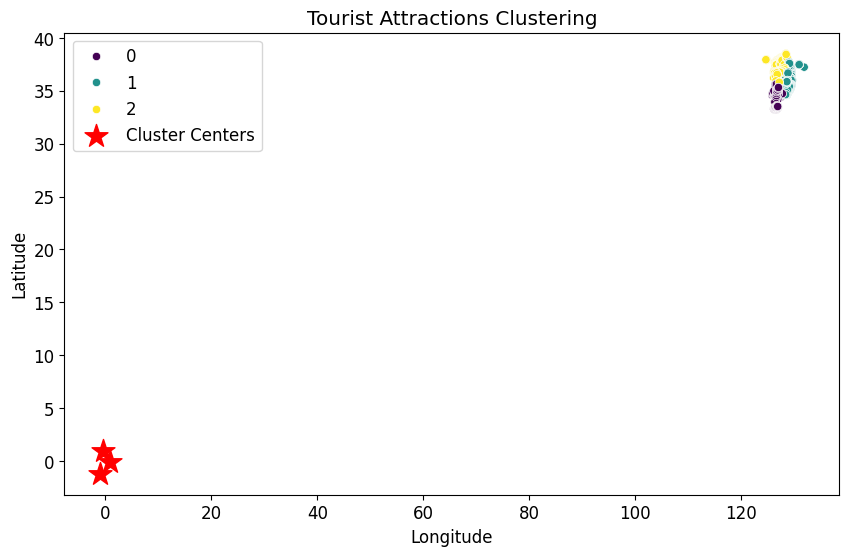

In [58]:
import seaborn as sns

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='경도(도)', y='위도(도)', hue='Cluster', data=df, palette='viridis', legend='full')

# 각 클러스터의 중심점 표시
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300, c='red', label='Cluster Centers')

plt.title('Tourist Attractions Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


클러스터 0:
중심점: 이 클러스터의 중심점은 주로 산악 지역이나 자연 경관이 아름다운 지역일 것으로 예상됩니다. 경도와 위도가 높은 값으로 나타날 것입니다.
주변의 관광지들: 주로 산악 경로, 등산로, 자연 공원, 동굴 등이 해당될 것으로 예상됩니다. 또한, 자연 경관을 감상할 수 있는 명소들이 많이 분포할 것입니다. 관광객들이 자연과 함께 쉬고 즐길 수 있는 장소로 해석할 수 있습니다.


클러스터 1:
중심점: 이 클러스터의 중심점은 주로 역사적인 장소나 문화적인 명소가 많은 지역일 것으로 예상됩니다. 경도와 위도가 중간 정도의 값으로 나타날 것입니다.
주변의 관광지들: 주로 유적지, 역사적인 건물, 전통 시장, 박물관, 문화 센터 등이 해당될 것으로 예상됩니다. 이 지역은 지역의 역사와 문화를 체험하고 이해할 수 있는 장소들로 해석할 수 있습니다.


클러스터 2:
중심점: 이 클러스터의 중심점은 주로 해변이나 바다 전망이 아름다운 지역일 것으로 예상됩니다. 경도와 위도가 낮은 값으로 나타날 것입니다.
주변의 관광지들: 주로 해변, 바다 전망이 아름다운 해안가, 해양 공원, 수상 스포츠 시설 등이 해당될 것으로 예상됩니다. 이 지역은 해수욕이나 수상 스포츠를 즐기며 휴가를 보내는 곳으로 해석할 수 있습니다.

In [65]:
# 데이터프레임에서 지역 아이디를 기준으로 관광지 수를 계산합니다.
tourist_attractions_by_region = df.groupby('지역 아이디')['관광지 아이디'].count().reset_index()
tourist_attractions_by_region.columns = ['지역 아이디', '관광지 수']

In [66]:
# 결과를 출력합니다.
display(tourist_attractions_by_region)

,지역 아이디,관광지 수
0,가평,46
1,강릉,36
2,강진,3
3,강화,4
4,거제,73
...,...,...
142,화성,5
143,화순,4
144,화천,3
145,환순,1


In [73]:
# 관광지 수를 기준으로 내림차순으로 정렬하여 상위 10개 지역 선택
top_10_regions = tourist_attractions_by_region.sort_values(by='관광지 수', ascending=False).head(10)

print(top_10_regions)

    지역 아이디  관광지 수
55     서귀포    147
57      서울    142
108     제주    137
18      광주    118
4       거제     73
48      부산     71
129     통영     70
35      대구     68
116     창원     58
30      남해     53


한글 폰트가 적용이 되지 않아 지역 아이디를 영어로 바꾸는 함수를 정의해 적용하였습니다.

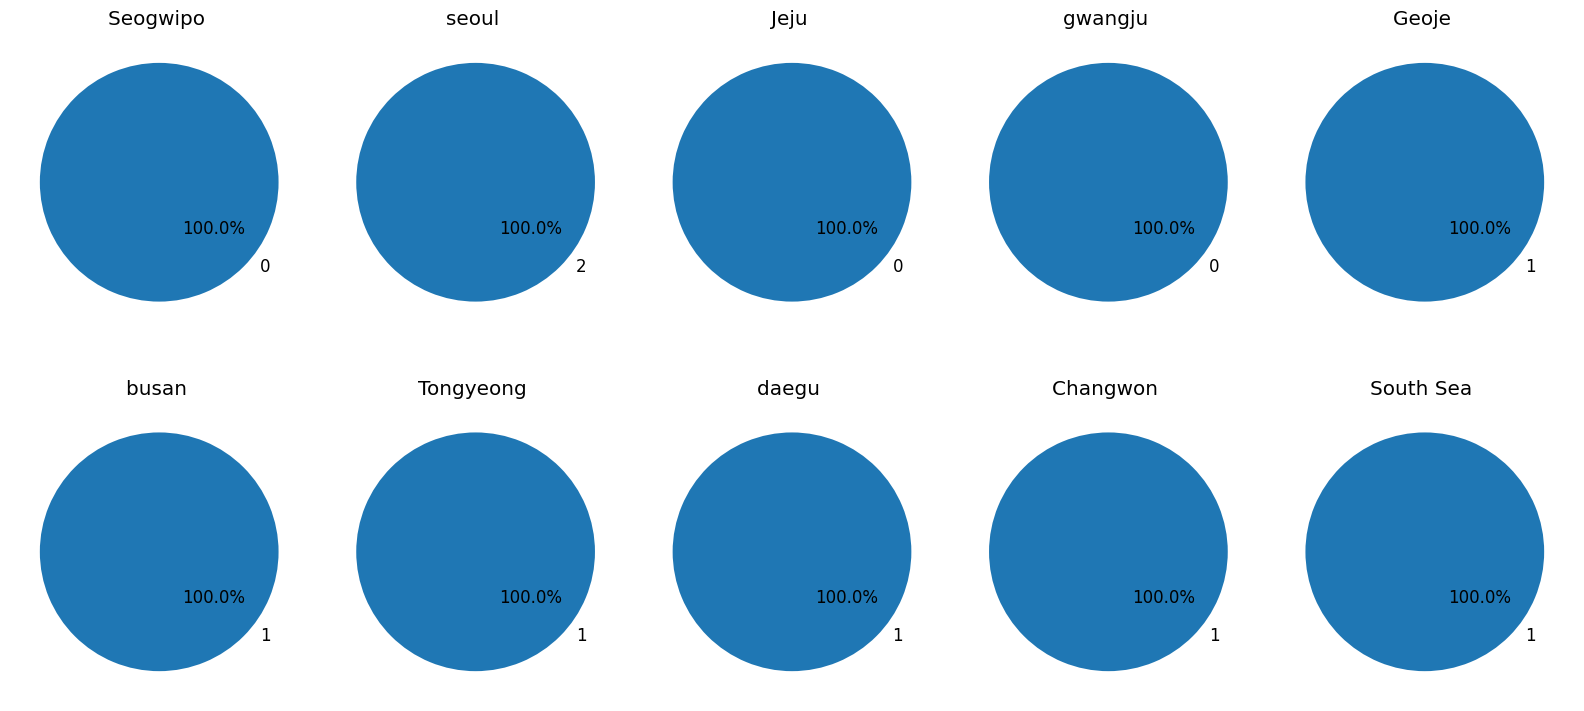

In [75]:
from googletrans import Translator

# translate_to_english 함수 정의
def translate_to_english(text):
    translator = Translator()
    translation = translator.translate(text, dest='en')
    return translation.text

# 상위 10개 지역 아이디를 한글에서 영어로 변환하여 저장
top_10_regions['지역 이름(영어)'] = top_10_regions['지역 아이디'].apply(translate_to_english)

# 상위 10개 지역의 클러스터 분포 시각화(파이 차트)
plt.figure(figsize=(16, 8))

for i, region_id in enumerate(top_10_regions['지역 아이디'], start=1):
    plt.subplot(2, 5, i)
    region_data = df[df['지역 아이디'] == region_id]
    cluster_distribution = region_data['Cluster'].value_counts().sort_index()
    plt.pie(cluster_distribution, labels=cluster_distribution.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"{top_10_regions['지역 이름(영어)'].iloc[i-1]} ")

plt.tight_layout()
plt.show()


위의 시각화 결과로 관광지가 제일 많이 분포되어 있는 서귀포는 클러스터 0으로 주로 산악 지역이나 자연 경관이 아름다운 지역인 것을 알 수 있습니다.